# tests for c-factor UDP (User Defined Processes)
This scripts shows how to receive the INCA prepared c-factor raster file for the RUSLE calculation in soil retention service <br>
<br>

In [1]:
import openeo

In [2]:
# additional imports for visualization and checks
from shapely.geometry import shape
import rasterio
from rasterio.plot import show, show_hist
from matplotlib import pyplot

In [3]:
# establish connection to OpenEO and authenticate
connection = openeo.connect("openeo.vito.be").authenticate_oidc()

Authenticated using refresh token.


In [4]:
# specify the geometry --> here small bbox next to TAP (VITO, Belgien)
polygon =  {"type": "Polygon", 
            "coordinates": [
                [[5.03, 51.22], [5.05, 51.22], [5.05, 51.2], [5.03, 51.2], [5.03, 51.22]
            ]]
           }

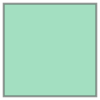

In [5]:
# show the extent
shape(polygon)

## get the c-factor for year 2019 in original EPSG & resolution

In [6]:
cube = connection.datacube_from_process(
    process_id="udp_Cfactor_prepared_load",
    namespace="https://raw.githubusercontent.com/integratedmodelling/OpenEO-UDP-UDF-catalogue/main/UDP/json/udp_cfactor_prepared_load.json",
    geometry=polygon,   
    year=2019)

In [7]:
# since the result is a single file we do not need a batch job - synchronous request
%time cube.download(r'./c-factor_INCA_2019_100m_EPSG3035.tif')

Wall time: 39.8 s


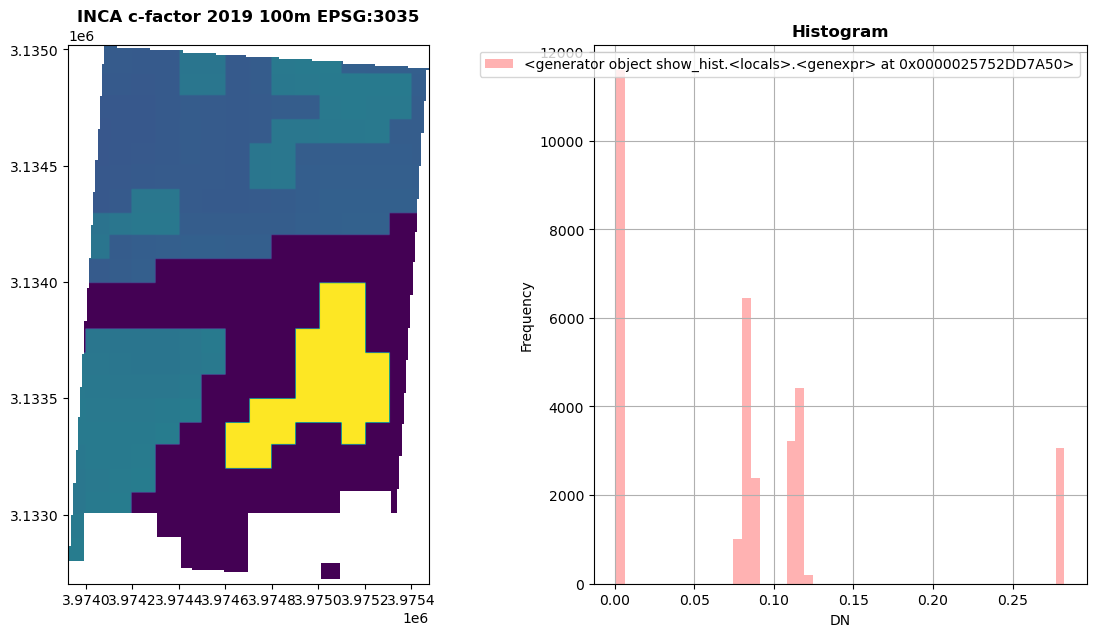

In [8]:
# visu result
with rasterio.open("c-factor_INCA_2019_100m_EPSG3035.tif") as src:
    fig, (axrgb, axhist) = pyplot.subplots(1, 2, figsize=(14,7))
    show(src, with_bounds=True, ax=axrgb, title='INCA c-factor 2019 100m EPSG:3035')
    show_hist(src, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram", ax=axhist)
    pyplot.show()

## reprojected c-factor datasets (EPSG: 4326, ~300m spatial resolution)

In [9]:
cube1 = connection.datacube_from_process(
    process_id="udp_Cfactor_prepared_load",
    namespace="https://raw.githubusercontent.com/integratedmodelling/OpenEO-UDP-UDF-catalogue/main/UDP/json/udp_cfactor_prepared_load.json",
    geometry=polygon,   
    year=2019,
    output_warp=True,
    output_epsg=4326,
    resolution=0.002976)

In [10]:
# get datasets
%time cube1.download(r'./c-factor_INCA_2019_300m_EPSG4326.tif')

Wall time: 48.5 s


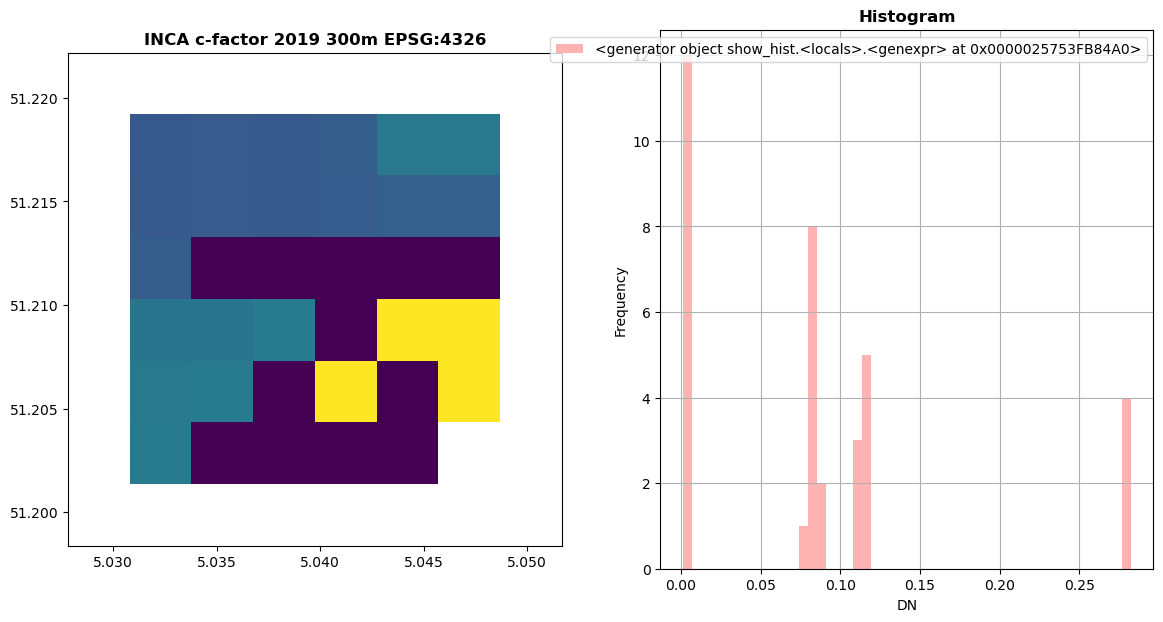

In [11]:
# visu result
with rasterio.open("c-factor_INCA_2019_300m_EPSG4326.tif") as src:
    fig, (axrgb, axhist) = pyplot.subplots(1, 2, figsize=(14,7))
    show(src, with_bounds=True, ax=axrgb, title='INCA c-factor 2019 300m EPSG:4326')
    show_hist(src, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram", ax=axhist)
    pyplot.show()

## full area test (Luxemburg) with resampling to 100m for years 2018, 2019, 2020

In [12]:
# specify the geometry --> here we just hardcode Luxemburg
polygon =  {"type": "Polygon", 
            "coordinates": [
                [[6.234, 49.9], [6.245, 49.897], [6.268, 49.889], [6.294, 49.879], [6.313, 49.873], [6.343, 49.865], 
                 [6.392, 49.849], [6.399, 49.847], [6.44, 49.834], [6.452, 49.828], [6.47, 49.823], [6.474, 49.82], 
                 [6.47, 49.802], [6.467, 49.794], [6.455, 49.765], [6.448, 49.743], [6.433, 49.698], [6.418, 49.653], 
                 [6.407, 49.627], [6.403, 49.619], [6.399, 49.603], [6.399, 49.6], [6.395, 49.592], [6.384, 49.558], 
                 [6.38, 49.55], [6.369, 49.473], [6.365, 49.471], [6.339, 49.471], [6.328, 49.471], [6.324, 49.473], 
                 [6.275, 49.476], [6.257, 49.476], [6.215, 49.478], [6.174, 49.481], [6.144, 49.481], [6.129, 49.484], 
                 [6.125, 49.484], [6.058, 49.486], [6.009, 49.489], [5.998, 49.492], [5.964, 49.492], [5.957, 49.494], 
                 [5.942, 49.494], [5.897, 49.497], [5.893, 49.497], [5.844, 49.529], [5.829, 49.539], [5.818, 49.547], 
                 [5.829, 49.571], [5.859, 49.643], [5.87, 49.672], [5.87, 49.675], [5.885, 49.709], [5.874, 49.72], 
                 [5.874, 49.722], [5.848, 49.749], [5.803, 49.794], [5.754, 49.844], [5.747, 49.852], [5.747, 49.855], 
                 [5.754, 49.863], [5.758, 49.865], [5.762, 49.871], [5.762, 49.873], [5.769, 49.881], [5.773, 49.884], 
                 [5.773, 49.887], [5.803, 49.918], [5.829, 49.953], [5.863, 49.99], [5.964, 50.109], [6.024, 50.183], 
                 [6.069, 50.162], [6.08, 50.157], [6.114, 50.141], [6.137, 50.13], [6.144, 50.112], [6.163, 50.072], 
                 [6.182, 50.027], [6.189, 50.011], [6.193, 49.998], [6.2, 49.982], [6.215, 49.95], [6.219, 49.94], 
                 [6.223, 49.926], [6.227, 49.921], [6.227, 49.918], [6.23, 49.91], [6.234, 49.9]]
            ]
           }

In [13]:
cube1 = connection.datacube_from_process(
    process_id="udp_Cfactor_prepared_load",
    namespace="https://raw.githubusercontent.com/integratedmodelling/OpenEO-UDP-UDF-catalogue/main/UDP/json/udp_cfactor_prepared_load.json",
    geometry=polygon,   
    year=2018,
    output_warp=True,
    output_epsg=3035,
    resolution=100)

cube2 = connection.datacube_from_process(
    process_id="udp_Cfactor_prepared_load",
    namespace="https://raw.githubusercontent.com/integratedmodelling/OpenEO-UDP-UDF-catalogue/main/UDP/json/udp_cfactor_prepared_load.json",
    geometry=polygon,   
    year=2019,
    output_warp=True,
    output_epsg=3035,
    resolution=100)

cube3 = connection.datacube_from_process(
    process_id="udp_Cfactor_prepared_load",
    namespace="https://raw.githubusercontent.com/integratedmodelling/OpenEO-UDP-UDF-catalogue/main/UDP/json/udp_cfactor_prepared_load.json",
    geometry=polygon,   
    year=2020,
    output_warp=True,
    output_epsg=3035,
    resolution=100)

In [14]:
# get datasets
%time cube1.download(r'./c-factor_INCA_2018_100m_EPSG3035_LU.tif')
%time cube2.download(r'./c-factor_INCA_2019_100m_EPSG3035_LU.tif')
%time cube3.download(r'./c-factor_INCA_2020_100m_EPSG3035_LU.tif')

Wall time: 1min 46s
Wall time: 1min 6s
Wall time: 3min 13s


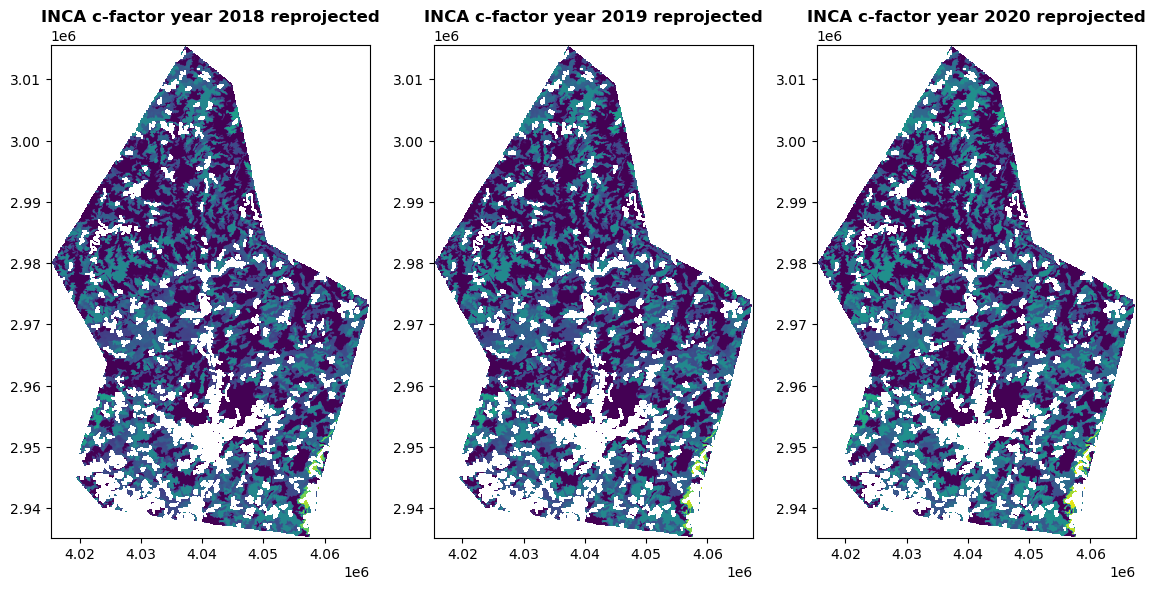

In [15]:
# visu result
with rasterio.open("c-factor_INCA_2018_100m_EPSG3035_LU.tif") as src, \
  rasterio.open("c-factor_INCA_2019_100m_EPSG3035_LU.tif") as src2, \
  rasterio.open("c-factor_INCA_2020_100m_EPSG3035_LU.tif") as src3:
    fig, (ax1, ax2, ax3) = pyplot.subplots(1, 3, figsize=(14,7))
    show(src, with_bounds=True, ax=ax1, title='INCA c-factor year 2018 reprojected')
    show(src2, with_bounds=True, ax=ax2, title='INCA c-factor year 2019 reprojected')
    show(src3, with_bounds=True, ax=ax3, title='INCA c-factor year 2020 reprojected')    
    pyplot.show()